In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from datetime import datetime
import datetime
import math
import matplotlib.gridspec as gridspec
from IPython.display import HTML

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

In [3]:
os.chdir('D:\\Moji fajlovi\\Master\\prog\\Project 5 - Agriculture Data Analysis')

In [4]:
data = pd.read_csv('database_biosense.csv',header=0, delimiter=';',skiprows=1)
data.head()

,Parcel,Area,Year,Crop,Seed production,Variety,Previous crop,Seed units,Manure,Fertiliser amount,...,Irrigation,Harvest,Seed,Fertiliser,Pesticide,Yield,Price,Revenue,Planting date,Harvest date
0,G-1/1,"63,38",2018,Maize,0,NS 205,Maize,184,0,"237,719575",...,9000,"11853,74",9450,"5037,277795","15202,25308","7,811454718","14,4","112484,9479",15.6.2018,15.10.2018
1,G-1/2,"23,01",2018,Barley,0,Salamandre,Maize,46,0,"238,6363636",...,0,"11762,74","8594,30605","7079,225979",1435,"7,146352313","15,8","112912,3665",28.9.2017,5.6.2018
2,G-2/1,"94,88",2018,Soybean,0,Gorstak,Maize,"100,33",0,"214,6331148",...,9000,"11549,5","10191,21689","7146,257137","11843,41404","3,388877141","37,35","126574,5612",19.4.2018,13.9.2018
3,G-2/2,"20,59",2018,Soybean,0,Wendy,Maize,"93,15",0,"140,8450704",...,0,"11571,08","5428,848956","4776,056338","12594,37882","3,71296746","37,35","138679,3346",17.4.2018,14.9.2018
4,G-3/1,"63,62",2018,Maize,0,DKC 5830,Wheat,60,"1,886199308","474,6934926",...,9000,"12801,04","19899,77051","19745,51399","4947,696479","14,60232631","14,4","210273,4989",17.4.2018,14.9.2018


In [5]:
data.isnull().any()

Parcel                    False
Area                      False
Year                      False
Crop                      False
Seed production           False
Variety                    True
Previous crop              True
Seed units                 True
Manure                    False
Fertiliser amount         False
Pesticide amount          False
Tillage                   False
Sowing                    False
Fertiliser application    False
Pesticide application     False
Irrigation                False
Harvest                   False
Seed                      False
Fertiliser                False
Pesticide                 False
Yield                     False
Price                     False
Revenue                   False
Planting date              True
Harvest date               True
dtype: bool

In [6]:
"""I filled 'Seed units' column because of later converting of elements into numbers"""
data.fillna({'Variety':'None','Previous crop': 'None', 'Seed units': '0'}, inplace=True)

In [7]:
convert_todot = lambda x: float(x.replace(',','.'))

In [8]:
data['Area'] = data['Area'].apply(convert_todot)

In [9]:
for i in list(data)[7:23]:
    try:
        data[i] = data[i].apply(convert_todot) #converting all columns expect one, which i will later process
    except ValueError:
        continue

In [10]:
drop = data['Planting date'].dropna()
i1 = list(drop.index.values)
dfdates = data.loc[i1] #I only pick rows in which planting (harvest, below) date exists

In [11]:
drop2 = dfdates['Harvest date'].dropna()
i2 = list(drop2.index.values)
dfdates = dfdates.loc[i2]

In [12]:
convert_date = lambda x: datetime.datetime.strptime(str(x), '%d.%m.%Y')

In [13]:
dfdates['Planting date'] = dfdates['Planting date'].apply(convert_date) #converting elements of column into datetime type
dfdates['Harvest date'] = dfdates['Harvest date'].apply(convert_date)

In [14]:
crops = list(data['Crop'].unique())
crops #list of crops in my database

['Maize',
 'Barley',
 'Soybean',
 'Wheat',
 'Sunflower',
 'Oilseed rape',
 '2nd soybean']

In [15]:
n = len(crops)

In [16]:
def plot_ph_date(dfdates,i):
    crop = list(dfdates['Crop'].unique())
    fig = plt.figure(figsize=(12,10))
    gs = gridspec.GridSpec(2,2) # i will have three histograms
    df = dfdates[dfdates['Crop']==crop[i]]
    
    dates = ['Planting date','Harvest date']
    
    ax1 = fig.add_subplot(gs[0,:]) #for the biggest histogram
    ax1.hist(df['Planting date'],color='darkgreen')
    ax1.hist(df['Harvest date'],color='darkorange')
    
        
    index_planting = [k for k in df[dates[0]].index.values if df.loc[k,dates[0]].year == 2017] #pick index where year is 2017.
    index_harvest = [k for k in df[dates[1]].index.values if df.loc[k,dates[1]].year == 2017] # same just year for harvest date
    title = '2017.' #title would have '2017.' except if title get change
    
    if crop[i] == 'Barley':
        """Barley is planted in 2017. and harvested in 2018., so i need to find index of Harvest date where year is 2018.
        which I will later plot."""
        index_harvest = [k for k in df[dates[1]].index.values if df.loc[k,dates[1]].year == 2018]
        ax1.clear() #clear the biggest histogram, because it don't show one of dates --> change bins.
        ax1.hist(df['Planting date'],color='darkgreen')
        ax1.hist(df['Harvest date'],bins=2,color='darkorange')
        title = '2018.'
    if crop[i] == '2nd soybean':
        ax1.clear() #similar, clear to change bins 
        ax1.hist(df['Planting date'],bins=4,color='darkgreen')
        ax1.hist(df['Harvest date'],bins=4,color='darkorange')
    ax1.set_ylabel('counts',fontsize=16)
    ax1.legend()
    ax1.grid(axis='y',color='lightgrey',alpha=0.5)
    ax1.set_facecolor('w')
    
    #setting yticks with condition, if interval (min(y),max(y)) is too small then step is 1, otherwise is 4
    y = ax1.get_yticks()
    if max(y) < 8:
        yint = range(math.floor(min(y)), math.ceil(max(y)))
    else:
        yint = range(math.floor(min(y)), math.ceil(max(y))+1,4)
    ax1.set_yticks(yint)
    
    #picking dates for plotting
    p_dates = df[dates[0]].loc[index_planting]
    h_dates = df[dates[1]].loc[index_harvest]
    
    #plot planting date, on the left side of figure
    ax = fig.add_subplot(gs[1,0])
    ax.hist(p_dates.values,color='darkgreen')
    ax.set_title('Distribution of '+dates[0]+' for 2017. year')
    ax.set_ylabel('counts',fontsize=10)
    ax.set_xlabel(dates[0], fontsize=10)
    ax.grid(axis='y',color='lightgrey',alpha=0.5)
    ax.set_facecolor('w')
    
    #setting yticks with condition, if interval (min(y),max(y)) is too small then step is 1, otherwise is 2
    y = ax.get_yticks()
    if max(y) <= 5:
        yint = range(math.floor(min(y)), math.ceil(max(y)))
    else:
        yint = range(math.floor(min(y)), math.ceil(max(y))+1,2)
    ax.set_yticks(yint)
    
    for tick in ax.get_xticklabels(): #rotate dates
        tick.set_rotation(55)
    
    #plot harvest date, on the right side of figure
    ax2 = fig.add_subplot(gs[1,1])
    ax2.hist(h_dates.values,color='darkorange')
    ax2.set_title('Distribution of '+dates[1]+' for '+title+' year') #if it plot barley then title variable is '2018.'
    ax2.set_ylabel('counts',fontsize=10)
    ax2.set_xlabel(dates[1], fontsize=10)
    ax2.grid(axis='y',color='lightgrey',alpha=0.5)
    ax2.set_facecolor('w')
    
    y = ax2.get_yticks()
    if max(y) <= 5:
        yint = range(math.floor(min(y)), math.ceil(max(y)))
    else:
        yint = range(math.floor(min(y)), math.ceil(max(y))+1,2)
    ax2.set_yticks(yint)
    
    for tick in ax2.get_xticklabels():
        tick.set_rotation(55)
    
    #setting xticks with interval (min(x)-10days,max(x)+10days) with step 1day
    pd = np.arange(p_dates.min()-datetime.timedelta(days=10),p_dates.max()+datetime.timedelta(days=10),datetime.timedelta(days=1)) 
    hd = np.arange(h_dates.min()-datetime.timedelta(days=10),h_dates.max()+datetime.timedelta(days=10),datetime.timedelta(days=1))

    ax.set_xticklabels([str(d)[:10] for d in pd])
    ax2.set_xticklabels([str(d)[:10] for d in hd])
    
    fig.align_labels()
    fig.suptitle(crop[i], fontsize = 30, y=0.99, fontweight='bold')
    fig.tight_layout()
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.3, wspace=0.35)
    #plt.savefig(crop[i]+".png", dpi=100,bbox_inches='tight',transparent=True)
    plt.show()
    plt.close(fig)
    

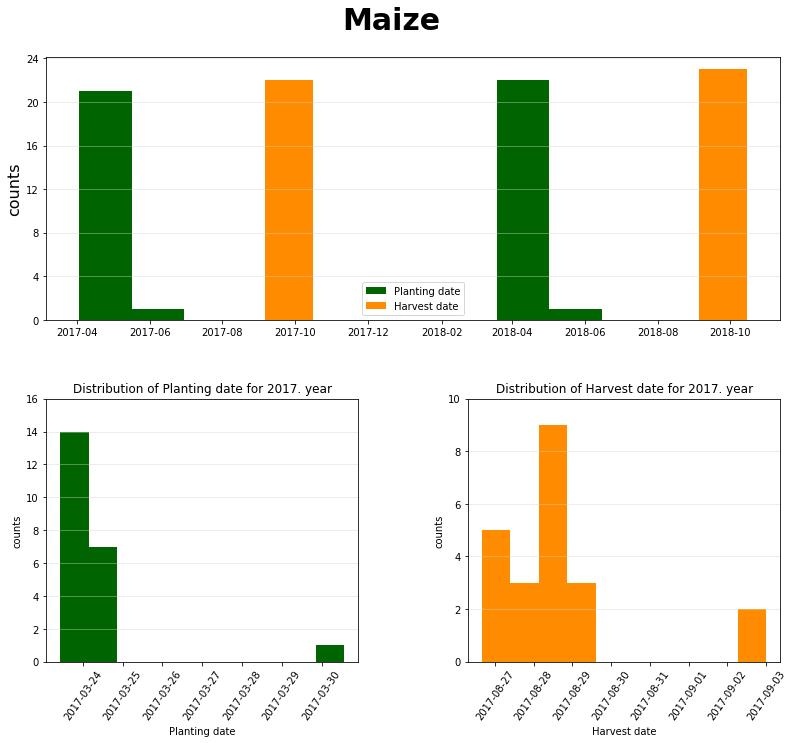

In [17]:
plot_ph_date(dfdates,0)

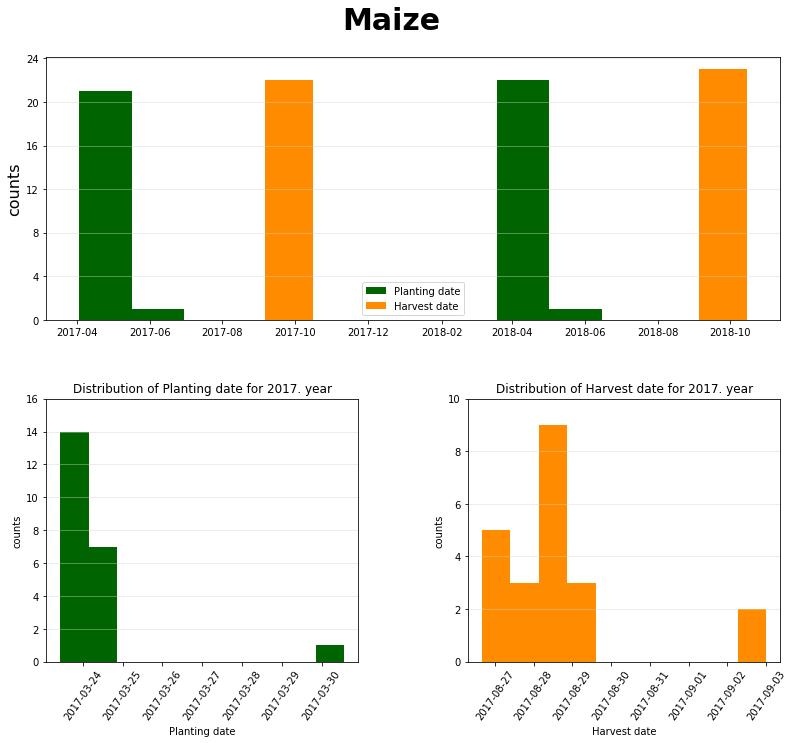

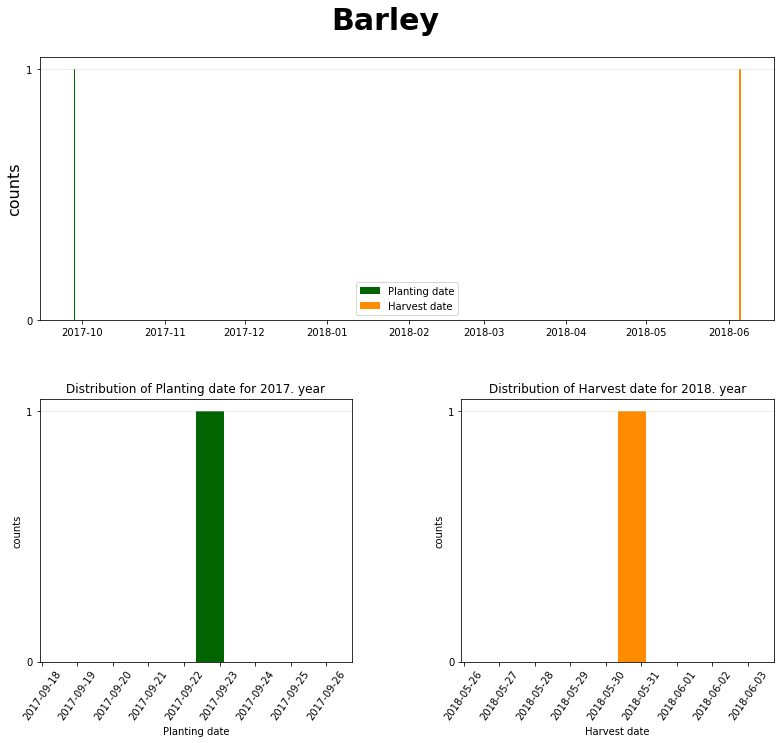

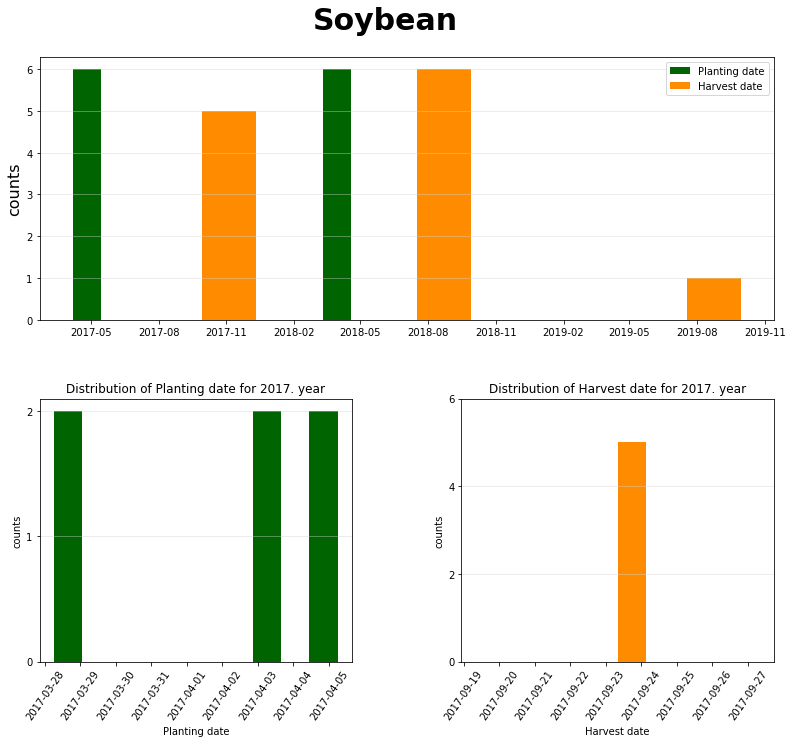

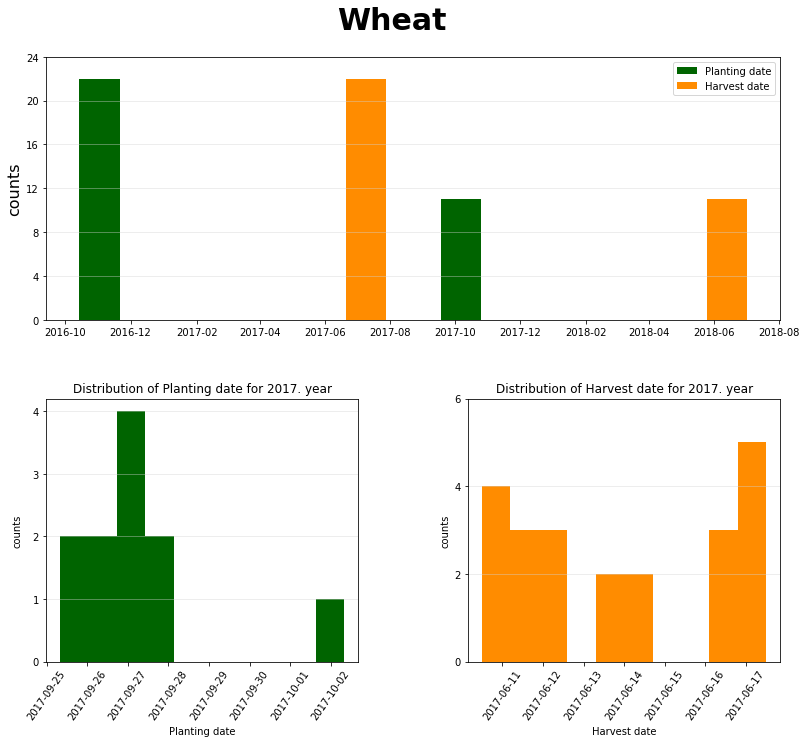

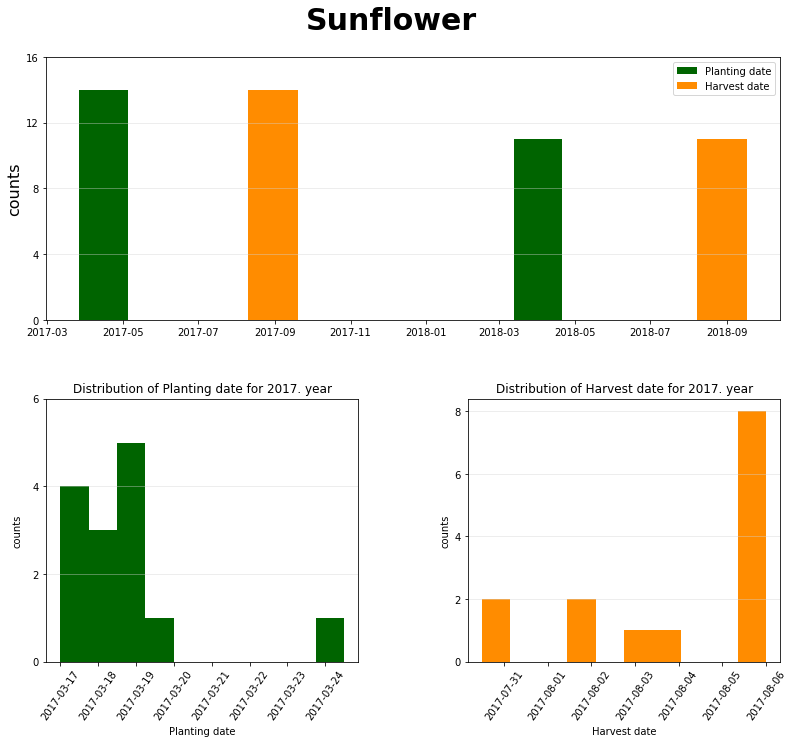

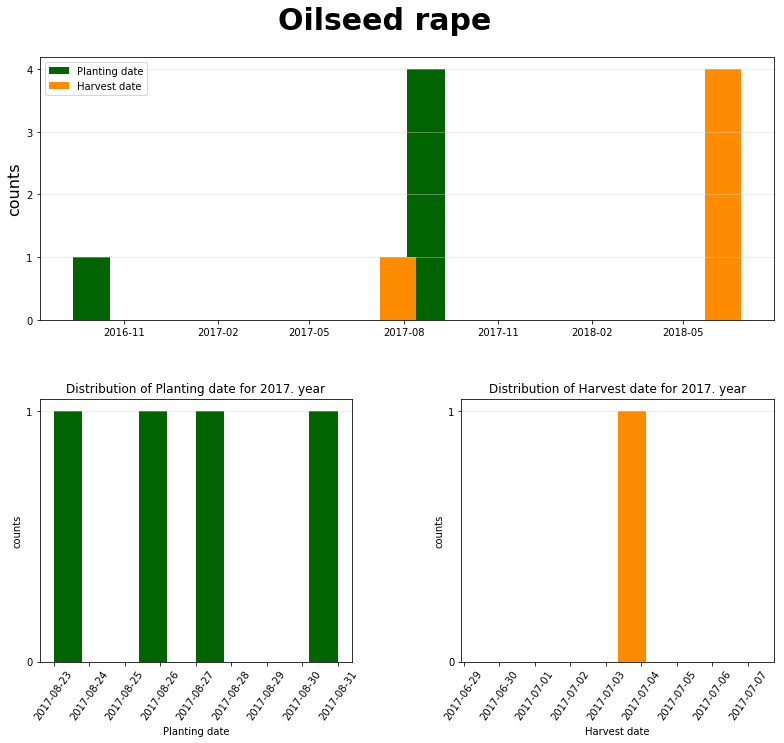

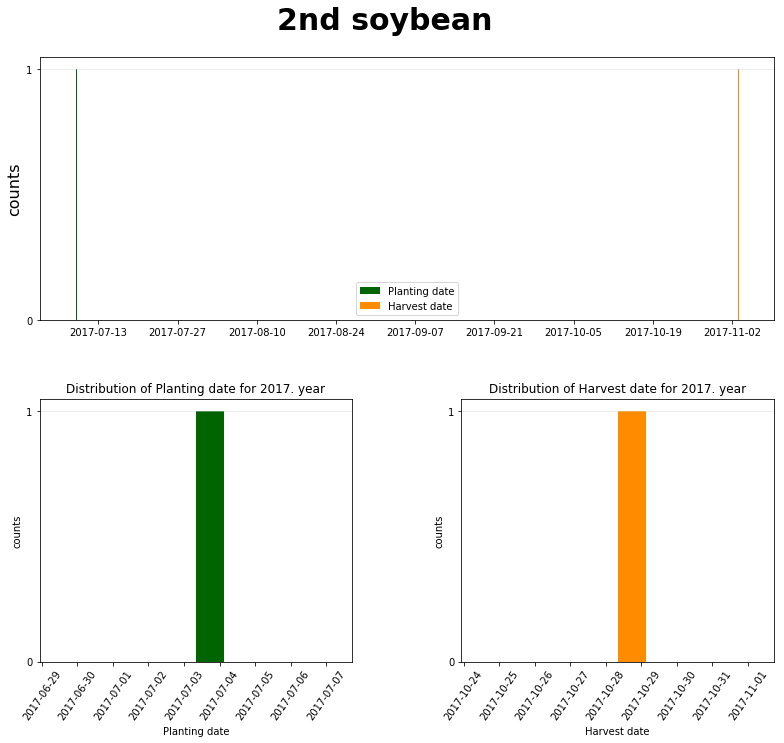

In [18]:
#plot for every crop from crops
for i in range(n):
    plot_ph_date(dfdates,i)

In [19]:
def plot_yield(data,i):
    crop = list(data['Crop'].unique())
    
    df2 = data[data['Crop']==crop[i]]
    
    df16 = df2[df2['Year'] == 2016]
    std16 = np.std(df16['Yield'])
    df17 = df2[df2['Year'] == 2017]
    std17 = np.std(df17['Yield'])
    df18 = df2[df2['Year'] == 2018]
    std18 = np.std(df18['Yield'])    
    
    box_line_col = ['steelblue','darkorange','darkgreen'] #palette for whiskers and other lines around box
    
    #plot years which have more then two lines in database for that crop, otherwise std is 0, and plot is line instead of box
    #also pick enough colors for lines on plot
    if df16.shape[0] <= 2:
        df2 = df2.query('Year == 2017 or Year == 2018')
        box_line_col = ['steelblue','darkorange']
    if df17.shape[0] <= 2:
        df2 = df2.query('Year == 2016 or Year == 2018')
        box_line_col = ['steelblue','darkorange']
        if df16.shape[0] <= 2:
            box_line_col = ['steelblue']
            
    if df18.shape[0] <= 2:
        df2 = df2.query('Year == 2017 or Year == 2016')
        box_line_col = ['steelblue','darkgreen']
        if df17.shape[0] <= 2:
            box_line_col = ['darkorange']
    
    #if for all years we have few data
    if df2.shape[0] <= 2:
        fig = plt.figure(figsize=(10,1))
        ax = fig.add_subplot(111)
        ax.text(0.1,1.5,'A little bit of data for '+crop[i]+'! Please expand your database.',fontsize=20,fontweight='bold',color='r')
        plt.axis('off')
        plt.close(fig)
    else:
        fig2 = plt.figure(figsize=(10,5))
        ax = fig2.add_subplot(1,1,1)
        palette = ["lightsteelblue", "navajowhite", "lightgreen"]
        sns.boxplot(x='Year',y='Yield',data=df2,palette=palette)
        ax.grid(axis='y',color='darkgray')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_color('darkgray')
    
    #coloring all lines on plot
        for j,col in enumerate(box_line_col):
            mybox = ax.artists[j]
            mybox.set_edgecolor(col)
            for k in range(j*6,j*6+6):
                line = ax.lines[k]
                line.set_color(col)
                line.set_mfc(col)
                line.set_mec(col)
    
        text = '\n'.join(('Variability of yield:',"\u2022 std 2016: "+str(round(std16,2)), '\u2022 std 2017: '+str(round(std17,2)),
                      '\u2022 std 2018: '+str(round(std18,2))))
        props = dict(boxstyle='round',facecolor='white', edgecolor='darkgreen', alpha=0.5,pad=0.5)
        plt.figtext(0.99, 0.4,text,family='sans-serif', color='k', fontsize=13, bbox=props)
    
        fig2.tight_layout()
        fig2.suptitle(crop[i],x=0.5,y=1.05,fontsize=20,fontweight='bold')
        #plt.savefig(crop[i]+"_yield.png", dpi=100,bbox_inches='tight',transparent=True)
        plt.show()
        plt.close(fig2)

In [20]:
plot_yield(data,6)

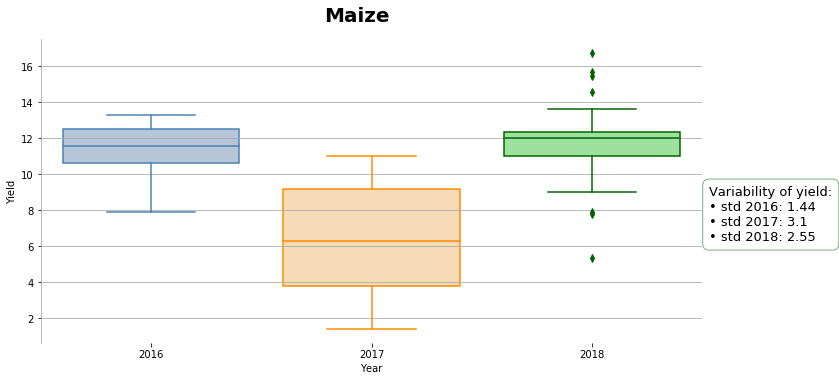

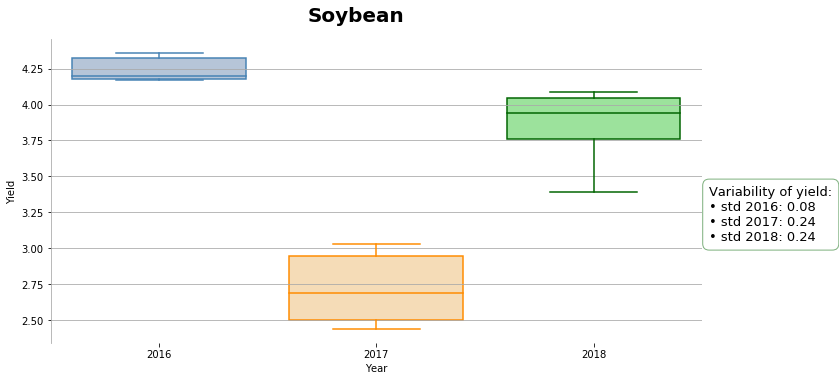

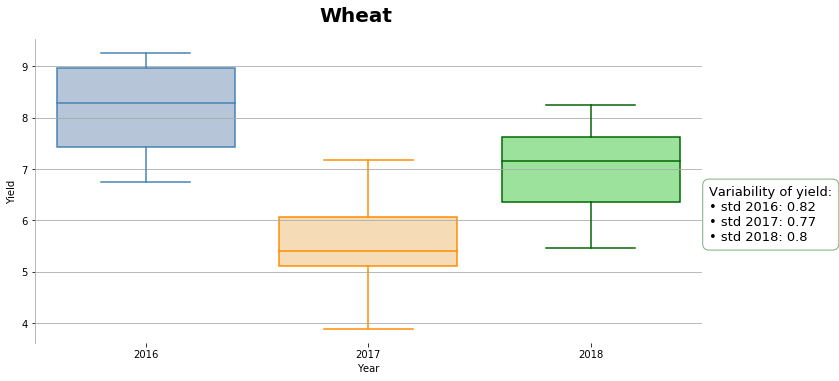

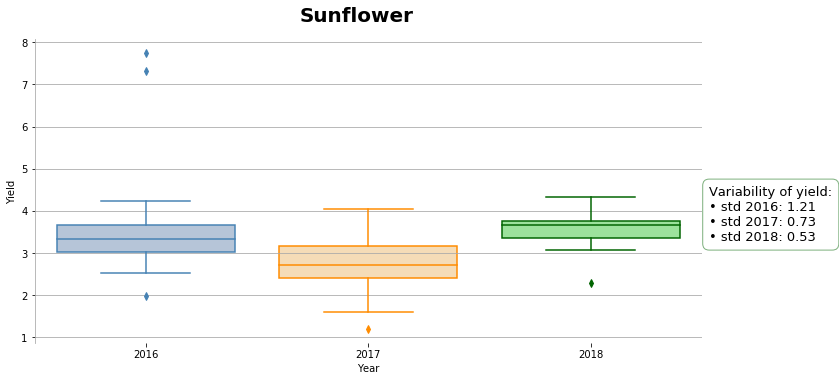

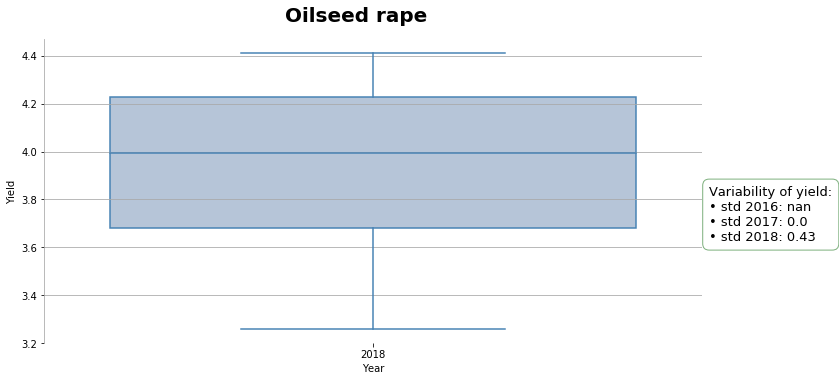

In [21]:
#plot boxplots for all crops
for i in range(n):
    plot_yield(data,i)

In [22]:
#function for percent on pie chart
def func(pct, allvals):
    percent = float((100*pct)/allvals.sum())
    return "{:.2f}%".format(pct,percent)

In [23]:
for i in range(n):
    
    df5 = data[data['Crop'] == crops[i]]
    length = len(df5['Variety'].unique())
    
    #plot only crops with more than 4 varieties
    if length>4:
        fig5 = plt.figure(figsize=(8,8))
        ax5 = fig5.add_subplot(111)
    
        vc = df5['Variety'].value_counts()
        sort = vc.sort_values(ascending=False)
        ssum = sort.sum()
        pie = sort.iloc[:5]
        pie = pie.append(pd.Series([ssum-pie.sum()],index=['Others']))
        
        wedges, texts, autotexts = ax5.pie(x=pie,autopct=lambda pct: func(pct, pie),radius=0.8)
        plt.setp(autotexts,fontsize=13,fontweight='bold', color='w')
        
        ax5.legend(loc=0,labels=list(pie.index.values),fontsize=15)
    
        props = dict(facecolor='white',edgecolor='dimgrey',alpha=0.5,pad=10)
        text = 'Planted unique varieties: '+str(length)
        plt.figtext(0.1,0.87,text,bbox=props,fontsize=15,va='top', ha='left')
        
        ax5.axis('off')
        
        fig5.suptitle(crops[i],x=0.5,y=1,fontsize=40,fontweight='medium')
        #plt.savefig(crops[i]+"_varieties.png", dpi=360,transparent=True)
        fig5.tight_layout()
        plt.close(fig5)
plt.show()

In [24]:
pivot = data[['Crop','Previous crop']].pivot_table(index='Previous crop', columns='Crop',aggfunc=len,fill_value=0,margins=True)
pivot

Crop,2nd soybean,Barley,Maize,Oilseed rape,Soybean,Sunflower,Wheat,All
Previous crop,,,,,,,,
Maize,0,1,1,0,10,8,15,35
None,0,1,30,0,6,38,19,94
Oilseed rape,0,0,0,0,0,0,1,1
Soybean,0,0,12,0,0,0,0,12
Sunflower,0,0,9,0,0,0,15,24
Wheat,1,0,16,5,2,7,0,31
All,1,2,68,5,18,53,50,197


In [25]:
pivot1 = data[['Crop','Previous crop']].pivot_table(index='Previous crop', columns='Crop',aggfunc=len,fill_value=0)
pivot1

Crop,2nd soybean,Barley,Maize,Oilseed rape,Soybean,Sunflower,Wheat
Previous crop,,,,,,,
Maize,0,1,1,0,10,8,15
None,0,1,30,0,6,38,19
Oilseed rape,0,0,0,0,0,0,1
Soybean,0,0,12,0,0,0,0
Sunflower,0,0,9,0,0,0,15
Wheat,1,0,16,5,2,7,0


In [26]:
#style with css
styles = [dict(selector="th", props=[("font-size", "100%"),("text-align", "center"),("background-color","olivedrab"),("border-left","0.2px solid black")]),
          dict(selector="caption", props=[("text-align","center"),("font-weight","bold"),("font-size","150%")]),
         dict(selector="td", props=[("font-size", "100%"),("text-align", "center"),("background-color","#cce59a"),("border","0.2px solid black")]),
          dict(selector="tbody tr:last-child", props=[("font-weight","bold")]),
          dict(selector="tr td:last-child", props=[("font-weight","bold")]),
          dict(selector="th:first-child", props=[("border","0.2px solid black")]),
         dict(selector='',props=[("border-collapse","collapse"),("border","0.2px solid black")])]

styler = pivot.style.set_table_styles(styles).set_caption('Pervious crop - crop pivot table')

styler

Crop,2nd soybean,Barley,Maize,Oilseed rape,Soybean,Sunflower,Wheat,All
Previous crop,,,,,,,,
Maize,0,1,1,0,10,8,15,35
None,0,1,30,0,6,38,19,94
Oilseed rape,0,0,0,0,0,0,1,1
Soybean,0,0,12,0,0,0,0,12
Sunflower,0,0,9,0,0,0,15,24
Wheat,1,0,16,5,2,7,0,31
All,1,2,68,5,18,53,50,197


In [27]:
#test for independence of Previous crop and Crop attribute; p-value,q-degree of freedom
chi2,p,q,expected = stats.chi2_contingency(pivot1)
chi2,p,q

(129.260154492606, 2.7603337632400324e-14, 30)

In [28]:
#functions that will be used for plot
def pdf(x,q):
    return 1/(math.pow(2,q/2)*math.gamma(q/2))*math.pow(x,q/2-1)*math.pow(math.e,-x/2)
def pdf_array(x,q):
    l = []
    for i in x:
        l.append(float(pdf(i,q)))
    return np.array(l)

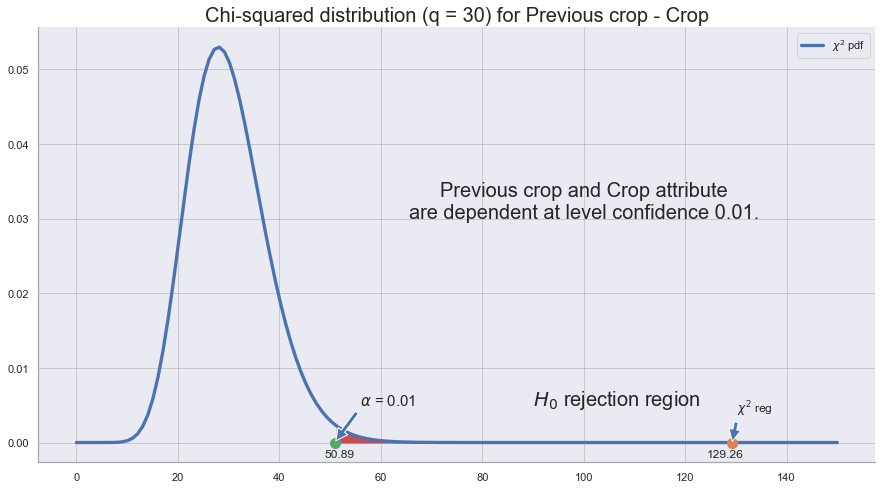

In [29]:
"""The null hypothesis is that Previous crop and Crop attribute are independent."""
sns.set(style='darkgrid',rc={"figure.figsize": (15, 8)})

x = np.linspace(0,150,150)
ax = sns.lineplot(x,pdf_array(x,q),label='$\chi^2 $ pdf',linewidth=3.3)



ax.plot([chi2], [pdf(chi2,q)], 'o',markersize=10)
ax.text(chi2-5,pdf(chi2,q)-0.002,str(round(chi2,2)))
ax.annotate(r'$\chi^2 $ reg',xy=(chi2,0),xytext=(chi2+1,0.004),arrowprops=dict(facecolor='b', shrink=0.05))

alpha = stats.chi2.ppf(0.99,q)
ax.fill_between(x,0,pdf_array(x,q),where=x>alpha,color='r')
ax.plot([alpha], [0], 'o',markersize=10)
ax.text(alpha-2,pdf(chi2,q)-0.002,str(round(stats.chi2.ppf(0.99,q),2)))
ax.annotate(r'$ \alpha $ = 0.01',xy=(alpha,0),xytext=(alpha+5,0.005),fontsize=15,arrowprops=dict(facecolor='b', shrink=0.05))
ax.text(90,0.005,'$ H_0 $ rejection region',fontsize=20)

if p <= 0.01:
    ax.text(100,0.03,'Previous crop and Crop attribute\n are dependent at level confidence 0.01.',ha='center',wrap=True,fontsize=20)
elif p <= 0.05:
    ax.text(100,0.03,'Previous crop and Crop attribute are dependent at level confidence 0.05.',ha='center',wrap=True,fontsize=20)
else:
    ax.text(100,0.03,'Previous crop and Crop attribute are independent.',ha='center',wrap=True,fontsize=20)

""" If the null hypothesis is true, the observed and expected frequencies will be close in value and the χ2 statistic will be 
close to zero. If the null hypothesis is false, then the χ2 statistic will be large"""
ax.set_title('Chi-squared distribution (q = '+str(q)+') for Previous crop - Crop',fontsize=20,fontweight=5)
ax.grid(color='darkgrey',alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('darkgray')
ax.spines['left'].set_color('darkgray')
figure = ax.get_figure()
figure.savefig('chi2.png',transparent=True)
plt.show()
plt.close(figure)

In [30]:
dfdates['Duration of \n season (days)'] = dfdates['Harvest date']-dfdates['Planting date']

In [31]:
dfdates['Duration of \n season (days)'] = dfdates['Duration of \n season (days)'].apply(lambda x: float(x.days))
dfdates

,Parcel,Area,Year,Crop,Seed production,Variety,Previous crop,Seed units,Manure,Fertiliser amount,...,Harvest,Seed,Fertiliser,Pesticide,Yield,Price,Revenue,Planting date,Harvest date,Duration of season (days)
0,G-1/1,63.38,2018,Maize,0,NS 205,Maize,184.000000,0.000000,237.719575,...,11853.74,9450.000000,5037.277795,15202.253080,7.811455,14.40,112484.94790,2018-06-15,2018-10-15,122.0
1,G-1/2,23.01,2018,Barley,0,Salamandre,Maize,46.000000,0.000000,238.636364,...,11762.74,8594.306050,7079.225979,1435.000000,7.146352,15.80,112912.36650,2017-09-28,2018-06-05,250.0
2,G-2/1,94.88,2018,Soybean,0,Gorstak,Maize,100.330000,0.000000,214.633115,...,11549.50,10191.216890,7146.257137,11843.414040,3.388877,37.35,126574.56120,2018-04-19,2018-09-13,147.0
3,G-2/2,20.59,2018,Soybean,0,Wendy,Maize,93.150000,0.000000,140.845070,...,11571.08,5428.848956,4776.056338,12594.378820,3.712967,37.35,138679.33460,2018-04-17,2018-09-14,150.0
4,G-3/1,63.62,2018,Maize,0,DKC 5830,Wheat,60.000000,1.886199,474.693493,...,12801.04,19899.770510,19745.513990,4947.696479,14.602326,14.40,210273.49890,2018-04-17,2018-09-14,150.0
5,G-3/2,17.80,2018,Maize,0,DKC 5830,Wheat,14.000000,2.134831,264.044944,...,12801.04,16595.812360,8427.921348,6112.939326,13.635393,14.40,196349.66290,2018-04-17,2018-09-14,150.0
6,G-4/1,63.32,2018,Soybean,0,Galeb,Maize,74.226153,0.000000,307.643714,...,11571.08,7447.109918,10072.501580,11048.218540,3.975837,37.35,148497.51260,2018-04-13,2018-09-16,156.0
7,G-4/2,24.71,2018,Soybean,0,Galeb,Maize,80.938891,0.000000,273.735330,...,11571.08,7447.109918,10072.501580,11048.218540,4.068798,37.35,151969.60740,2018-04-13,2018-09-16,156.0
8,G-5/1,76.88,2018,Maize,0,DKC 5830,Soybean,0.949532,0.000000,386.485432,...,12801.04,20071.655440,7823.860562,9002.979318,16.763788,14.40,241398.54320,2018-04-13,2018-09-16,156.0
9,G-5/2,20.98,2018,Maize,0,DKC 5830,Soybean,0.810296,0.000000,266.920877,...,12801.04,19877.951480,8530.791230,7781.716397,11.231649,14.40,161735.74830,2018-04-13,2018-09-16,156.0


In [32]:
#additinally analysis
duration_mean = dfdates['Duration of \n season (days)'].groupby(dfdates['Crop']).mean()
duration_mean

Crop
2nd soybean     117.000000
Barley          250.000000
Maize           155.533333
Oilseed rape    293.400000
Soybean         219.916667
Sunflower       138.680000
Wheat           249.575758
Name: Duration of \n season (days), dtype: float64

In [33]:
duration_mean = duration_mean.apply(lambda x: round(x))
duration_mean

Crop
2nd soybean     117
Barley          250
Maize           156
Oilseed rape    293
Soybean         220
Sunflower       139
Wheat           250
Name: Duration of \n season (days), dtype: int64

In [34]:
ddf = pd.DataFrame(columns=['Crop','Variety with max season','Max season'])
for i in range(n):
    df = dfdates[dfdates['Crop'] == crops[i]]
    duration_variety = df['Duration of \n season (days)'].groupby(dfdates['Variety']).mean()
    sort_duration = duration_variety.sort_values(ascending=False)
    ddf.loc[i] = [crops[i],list(sort_duration.index.values)[0],sort_duration[0]]
ddf = ddf.set_index('Crop')
ddf['Max season'] = ddf['Max season'].apply(lambda x: round(x))
ddf

,Variety with max season,Max season
Crop,,
Maize,NS 3023,166
Barley,Salamandre,250
Soybean,Wendy,274
Wheat,Sofru + Avenue,263
Sunflower,LG 56.33Cl,146
Oilseed rape,Immient,293
2nd soybean,Favorit,117


In [35]:
dur = pd.concat([duration_mean,ddf],axis=1,sort=True)
dur.columns = ['Duration of \n season (days)','Variety with max \n season','Max season']
dur

,Duration of season (days),Variety with max season,Max season
2nd soybean,117,Favorit,117
Barley,250,Salamandre,250
Maize,156,NS 3023,166
Oilseed rape,293,Immient,293
Soybean,220,Wendy,274
Sunflower,139,LG 56.33Cl,146
Wheat,250,Sofru + Avenue,263


In [36]:
styles = [dict(selector="th", props=[("font-size", "100%"),("text-align", "center"),("background-color","olivedrab"),("border-left","0.2px solid black")]),
          dict(selector="caption", props=[("text-align","center"),("font-weight","bold"),("font-size","150%")]),
         dict(selector="td", props=[("font-size", "100%"),("text-align", "center"),("background-color","#cce59a"),("border","0.2px solid black")]),
          dict(selector="th:first-child", props=[("border","0.2px solid black")]),
         dict(selector='',props=[("border-collapse","collapse"),("border","0.2px solid black")])]

stylerd = dur.style.set_table_styles(styles).set_caption('Duration of season')

stylerd

,Duration of season (days),Variety with max season,Max season
2nd soybean,117,Favorit,117
Barley,250,Salamandre,250
Maize,156,NS 3023,166
Oilseed rape,293,Immient,293
Soybean,220,Wendy,274
Sunflower,139,LG 56.33Cl,146
Wheat,250,Sofru + Avenue,263


In [37]:
#I use my function from Homework1 
def corr(y):    
    Z = {}  #for centered attributes vectors
    for j in list(y):
        mean = y[j].sum()*(1/y[j].shape[0])
        Z[j] = [i - mean for i in y[j]] #centered vector for attribute j
        
    df_dic = {' ': list(y)}
    for j in list(y):
        Zj = np.array(Z[j])
        df_list = []
        for i in list(y):
            Zi = np.array(Z[i])
            norm_Zj = np.linalg.norm(Zj,2)
            norm_Zi = np.linalg.norm(Zi,2)
            df_list.append(np.dot(np.transpose(Zj/norm_Zj),Zi/norm_Zi)) #corr = cos(teta) for every two attributes i and j
        df_dic[j] = df_list #correlations for attribute j relative to all attributes (include corr for j,j) 
    columns = list(df_dic.keys())
    sigmaCorr = pd.DataFrame(df_dic, columns = columns)
    sigmaCorr = sigmaCorr.set_index(' ')
    sns.set(font_scale=1, rc={"figure.figsize": (8, 8)})
    ax = sns.heatmap(sigmaCorr, square=True, annot=True,annot_kws={'fontsize': 20},cmap="YlGn")
    ax.set_yticklabels(list(y),fontsize=13,rotation=0)
    ax.set_xticklabels(list(y),fontsize=13,rotation=90)
    ax.set_title('Heat map for correlation', fontsize='30',fontweight='bold')
    figure = ax.get_figure()
    #figure.savefig('correlation.png',bbox_inches='tight',transparent=True)
    plt.show()
    plt.close(figure)
    return sigmaCorr

In [38]:
corr_list = ['Yield','Seed','Fertiliser','Pesticide','Duration of \n season (days)'] #list of attributes for correlation

In [39]:
dfcorr = dfdates[corr_list] #data frame for correlation

In [40]:
dfcorr.dtypes

Yield                           float64
Seed                            float64
Fertiliser                      float64
Pesticide                       float64
Duration of \n season (days)    float64
dtype: object

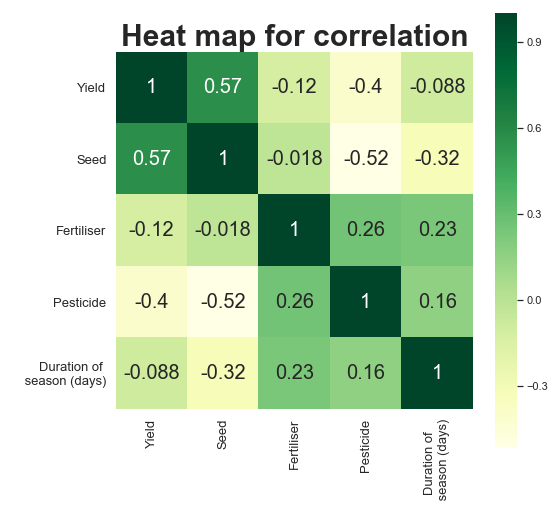

,Yield,Seed,Fertiliser,Pesticide,Duration of season (days)
,,,,,
Yield,1.000000,0.571941,-0.117464,-0.402151,-0.088180
Seed,0.571941,1.000000,-0.018409,-0.515666,-0.324905
Fertiliser,-0.117464,-0.018409,1.000000,0.259960,0.232481
Pesticide,-0.402151,-0.515666,0.259960,1.000000,0.157007
Duration of \n season (days),-0.088180,-0.324905,0.232481,0.157007,1.000000


In [41]:
corr(dfcorr)

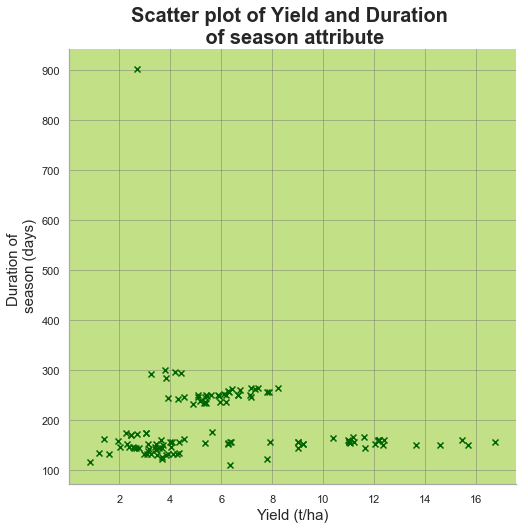

In [42]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(np.array(dfcorr['Yield']),np.array(dfcorr['Duration of \n season (days)']), c=('darkgreen'), marker = 'x')
ax.set_title('Scatter plot of Yield and Duration \n of season attribute',fontweight='bold',fontsize=20)
ax.set_xlabel('Yield (t/ha)',fontsize=15)
ax.set_ylabel('Duration of \n season (days)',fontsize=15)
ax.grid(True,color='dimgray',alpha=0.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('darkgray')
ax.spines['left'].set_color('darkgray')
ax.set_facecolor('#c2e085')

fig.savefig('scatter.png',bbox_inches='tight',transparent=True)
plt.show()
plt.close(fig)

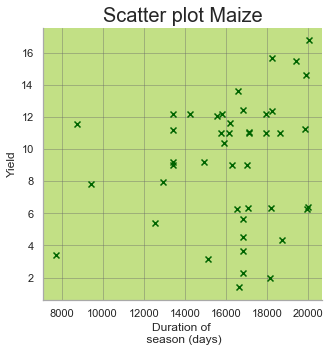

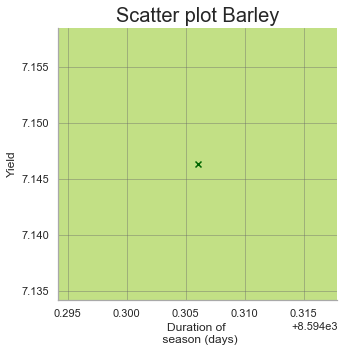

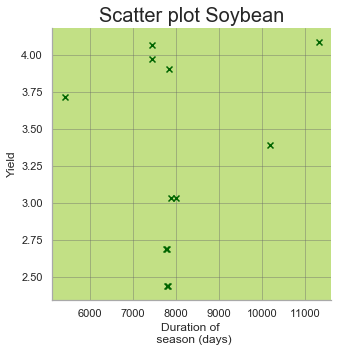

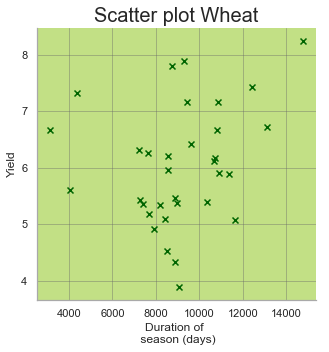

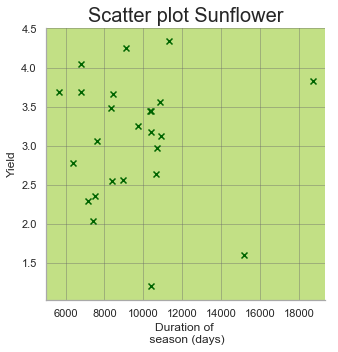

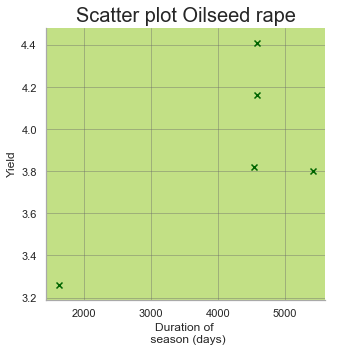

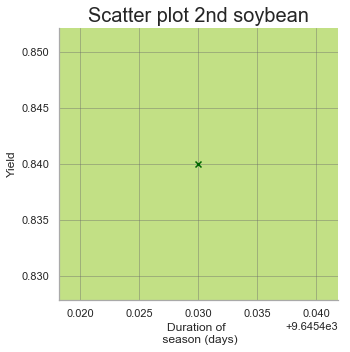

In [45]:
"""in most cases yield and duration of season are unrelated (for wheat we have something like positive correlation)"""
for i in range(n):
    df = dfdates[dfdates['Crop'] == crops[i]]
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.scatter(np.array(df['Seed']),np.array(df['Yield']), c=('darkgreen'), marker = 'x')
    ax.set_title('Scatter plot '+crops[i], fontsize='20')
    ax.set_xlabel('Duration of \n season (days)')
    ax.set_ylabel('Yield')
    ax.grid(True,color='dimgray',alpha=0.4)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_color('darkgray')
    ax.spines['left'].set_color('darkgray')
    ax.set_facecolor('#c2e085')
    plt.show()
    plt.close(fig)

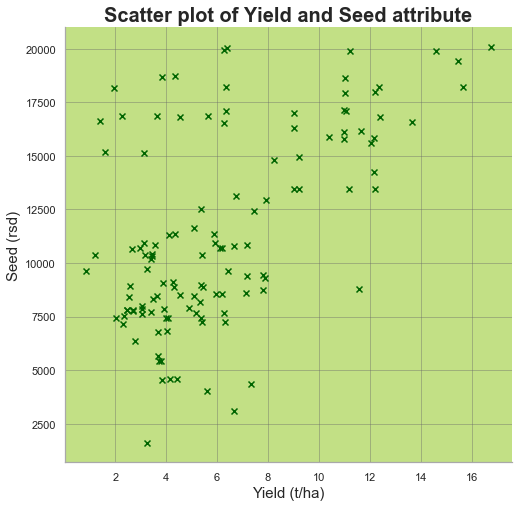

In [44]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(np.array(dfcorr['Yield']),np.array(dfcorr['Seed']), c=('darkgreen'), marker = 'x')
ax.set_title('Scatter plot of Yield and Seed attribute',fontweight='bold',fontsize=20)
ax.set_xlabel('Yield (t/ha)',fontsize=15)
ax.set_ylabel('Seed (rsd)',fontsize=15)
ax.grid(True,color='dimgray',alpha=0.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('darkgray')
ax.spines['left'].set_color('darkgray')
ax.set_facecolor('#c2e085')

fig.savefig('scatter2.png',bbox_inches='tight',transparent=True)
plt.show()
plt.close(fig)

In [46]:
costs = list(data)[11:20] #costs are in database from column 11 till 19
costs

['Tillage',
 'Sowing',
 'Fertiliser application',
 'Pesticide application',
 'Irrigation',
 'Harvest',
 'Seed',
 'Fertiliser',
 'Pesticide']

In [47]:
dfcosts = data[costs]
for i in dfcosts['Pesticide application'].index.values:
    try:
        float(dfcosts.loc[i,'Pesticide application'].replace(',','.')) #in column Pesticide application one element is #REF! 
    except ValueError:
        dfcosts = dfcosts.drop(i,axis=0) #delete row if error occurs
        datap = data.drop(i,axis=0) #need to delete row from this df too
dfcosts['Pesticide application'] = dfcosts['Pesticide application'].apply(convert_todot) #now we can convert objects to numbers

In [48]:
datap['Profit'] = datap['Revenue'] - dfcosts.sum(axis=1)

In [49]:
sort = datap['Profit'].sort_values(ascending=False)

In [50]:
parcel = []
crop_list = []
area = []
profit = []
yield_ = []
for i in sort[:5].index.values:
    profit += [round(sort.loc[i],2)]
    parcel += [datap.loc[i,'Parcel']]
    crop_list += [datap.loc[i,'Crop']]
    area += [round(datap.loc[i,'Area'],2)]
    yield_ += [round(datap.loc[i,'Yield']*1000,2)]
d = {'': [1,2,3,4,5],'Parcel': parcel,'Area (ha)': area,'Crop': crop_list,'Yield (kg/ha)': yield_,'Profit (RSD/ha)': profit}
top5 = pd.DataFrame(d,columns=['','Parcel','Area (ha)','Crop','Yield (kg/ha)','Profit (RSD/ha)'])
top5 #top 5 fields with the best profit

,,Parcel,Area (ha),Crop,Yield (kg/ha),Profit (RSD/ha)
0,1,167B,3.77,Sunflower,7750.00,170463.89
1,2,ED Backa,3.56,Sunflower,7310.00,152209.42
2,3,G-5/1,76.88,Maize,16763.79,147285.83
3,4,G-8/1,78.49,Maize,15672.08,144390.43
4,5,G-3/2,17.80,Maize,13635.39,124376.19


In [51]:
top5 = top5.set_index('')
top5

,Parcel,Area (ha),Crop,Yield (kg/ha),Profit (RSD/ha)
,,,,,
1,167B,3.77,Sunflower,7750.00,170463.89
2,ED Backa,3.56,Sunflower,7310.00,152209.42
3,G-5/1,76.88,Maize,16763.79,147285.83
4,G-8/1,78.49,Maize,15672.08,144390.43
5,G-3/2,17.80,Maize,13635.39,124376.19


In [52]:
styles = [dict(selector="th", props=[("font-size", "100%"),("text-align", "center"),("background-color","olivedrab"),("border-left","0.2px solid black")]),
          dict(selector="caption", props=[("text-align","center"),("font-weight","bold"),("font-size","150%")]),
         dict(selector="td", props=[("font-size", "100%"),("text-align", "center"),("background-color","#cce59a"),("border","0.2px solid black")]),
         dict(selector='',props=[("border-collapse","collapse"),("border","0.2px solid black")])]

styler2 = top5.style.set_table_styles(styles).set_caption("Top 5 fileds with best profit")

styler2

,Parcel,Area (ha),Crop,Yield (kg/ha),Profit (RSD/ha)
,,,,,
1,167B,3.77,Sunflower,7750,170464
2,ED Backa,3.56,Sunflower,7310,152209
3,G-5/1,76.88,Maize,16763.8,147286
4,G-8/1,78.49,Maize,15672.1,144390
5,G-3/2,17.8,Maize,13635.4,124376


In [53]:
grouped_profit = datap['Profit'].groupby(datap['Crop'])
profit_mean = grouped_profit.mean()
profit_mean

Crop
2nd soybean    -36906.834983
Barley          50174.853969
Maize           57599.027525
Oilseed rape    38036.122779
Soybean         62208.379766
Sunflower       26573.120755
Wheat           20725.734688
Name: Profit, dtype: float64

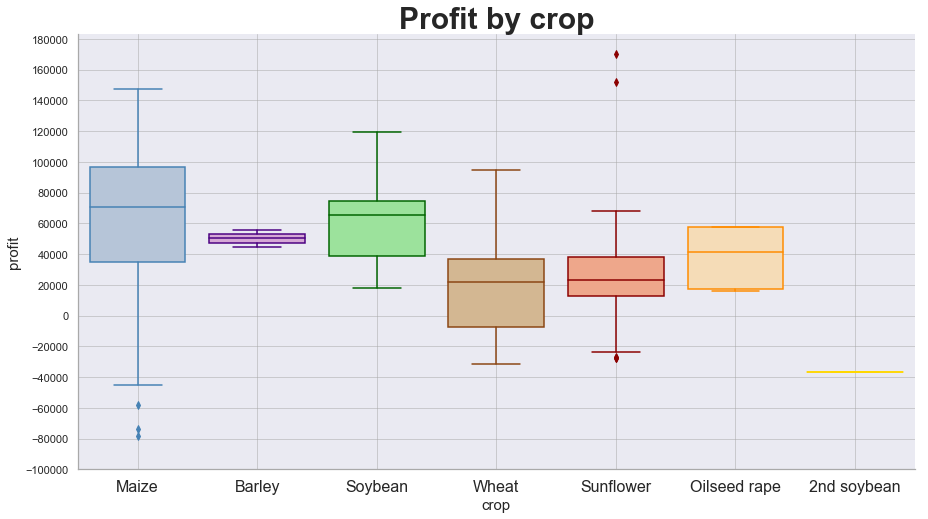

In [54]:
#I didn't used this on presentation, but this is like all in one picture
sns.set(style='darkgrid',rc={"figure.figsize": (15, 8)})
palette=['lightsteelblue','plum','lightgreen','burlywood','lightsalmon','navajowhite','gold']
ax = sns.boxplot(x='Crop',y='Profit',data=datap[['Crop','Profit']],palette=palette)

box_line_col = ['steelblue','indigo','darkgreen','saddlebrown','darkred','darkorange','gold']

for j,col in enumerate(box_line_col):
    mybox = ax.artists[j]
    mybox.set_edgecolor(col)
    for k in range(j*6,j*6+6):
        line = ax.lines[k]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax.set_ylabel('profit',fontsize=15)
ax.set_xlabel('crop',fontsize=15)
ax.set_xticklabels(crops,fontsize=16)
y = ax.get_yticks()
yint = range(math.floor(min(y)),math.ceil(max(y)),20000)
ax.set_yticks(yint)


ax.set_title('Profit by crop', fontsize=30,fontweight='bold')
ax.grid(color='darkgrey',alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('darkgray')
ax.spines['left'].set_color('darkgray')

figure = ax.get_figure()
#figure.savefig('Profit by crop',transparent=True)
plt.show()
plt.close(figure)

In [55]:
sorted_profit = profit_mean.sort_values(ascending=False)
sorted_profit

Crop
Soybean         62208.379766
Maize           57599.027525
Barley          50174.853969
Oilseed rape    38036.122779
Sunflower       26573.120755
Wheat           20725.734688
2nd soybean    -36906.834983
Name: Profit, dtype: float64

In [56]:
profit_std = grouped_profit.std()
profit_std

Crop
2nd soybean              NaN
Barley           7860.820524
Maize           53521.963942
Oilseed rape    20674.666337
Soybean         29298.820126
Sunflower       36091.136935
Wheat           33398.308669
Name: Profit, dtype: float64

In [57]:
relative = profit_std/profit_mean
relative

Crop
2nd soybean          NaN
Barley          0.156669
Maize           0.929216
Oilseed rape    0.543553
Soybean         0.470979
Sunflower       1.358182
Wheat           1.611441
Name: Profit, dtype: float64

In [58]:
relative.dropna(inplace=True) #for 2nd soybean std is NaN so I drop this row
relative

Crop
Barley          0.156669
Maize           0.929216
Oilseed rape    0.543553
Soybean         0.470979
Sunflower       1.358182
Wheat           1.611441
Name: Profit, dtype: float64

In [59]:
sorted_relative = relative.sort_values(ascending=False)
sorted_relative

Crop
Wheat           1.611441
Sunflower       1.358182
Maize           0.929216
Oilseed rape    0.543553
Soybean         0.470979
Barley          0.156669
Name: Profit, dtype: float64

In [60]:
os.chdir('D:\\Moji fajlovi\\Master\\prog\\Project 5 - Agriculture Data Analysis\\images') #changing folder for pictures

In [63]:
#Figure with name of crop, average and relative profit and boxplot for that crop
def profit(data,i):
    palette = ['tomato','springgreen','goldenrod','lightgreen','#b3b300','yellowgreen','mediumaquamarine']
    crop = list(data['Crop'].unique())
    df = data[data['Crop']==crop[i]]
    
    grouped_profit = datap['Profit'].groupby(datap['Crop'])
    profit_mean = grouped_profit.mean()
    profit_std = grouped_profit.std()
    relative = profit_std/profit_mean
    relative.dropna(inplace=True)
    
    fig = plt.figure(figsize=(8,8),facecolor=palette[i])
    if crop[i] == '2nd soybean':
        ax = fig.add_subplot(111)
        ax.text(0.1,1.5,'A little bit of data for '+crop[i]+'! Please expand your database.',fontsize=20,fontweight='bold',color='r')
        plt.axis('off')
    else:
        gs = gridspec.GridSpec(2,2)
    
        ax = fig.add_subplot(gs[0,1])
        im = plt.imread(crop[i]+'.png')
        im[np.all(im == [0, 0, 0, 255], axis=2)] = [0, 0, 0, 0] #remove black background
        ax.imshow(im)
        ax.axis('off')
    
        ax3 = fig.add_subplot(gs[1,0])
        sns.boxplot(x='Crop',y='Profit',data=df,ax=ax3, palette=['burlywood'])
        ax3.set_facecolor(palette[i])
        ax3.spines['top'].set_visible(False)
        ax3.spines['bottom'].set_visible(False)
        ax3.spines['right'].set_visible(False)
        ax3.spines['left'].set_color('dimgray')
        ax3.tick_params(axis='y', colors='k',labelsize=15)
        ax3.tick_params(axis='x', colors='k',labelsize=15)
        ax3.set_ylabel('Profit (rsd/ha)',fontsize=15)
        ax3.set_xlabel('Crop',fontsize=15)
        ax3.grid(axis='y',color='dimgrey')
    
        plt.figtext(0.6,0.4,'Average profit \n'+str(round(profit_mean[crops[i]],2))+' RSD/ha',fontsize=25,fontweight='bold')
        plt.figtext(0.6,0.25,'Relative profit \n'+str(round(relative[crops[i]],2)),fontsize=25,fontweight='bold')
    
        fig.suptitle(crop[i],x=0.3,y=0.79,fontsize=50,fontweight='bold')
        fig.tight_layout()
        #fig.savefig(crop[i]+'_profit.png',bbox_inches='tight',facecolor=palette[i])
    plt.show()
    plt.close(fig)

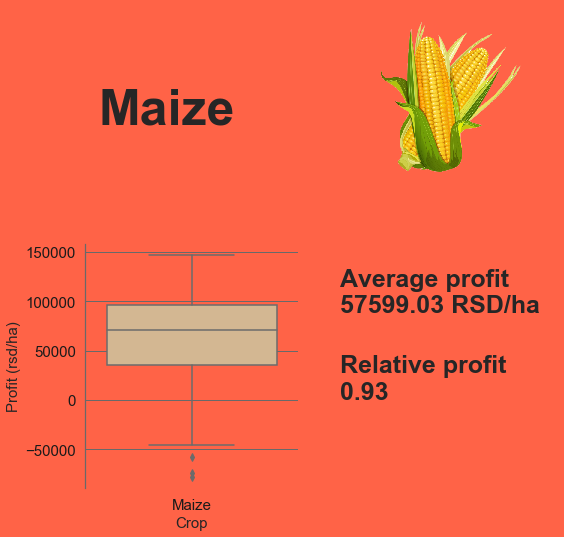

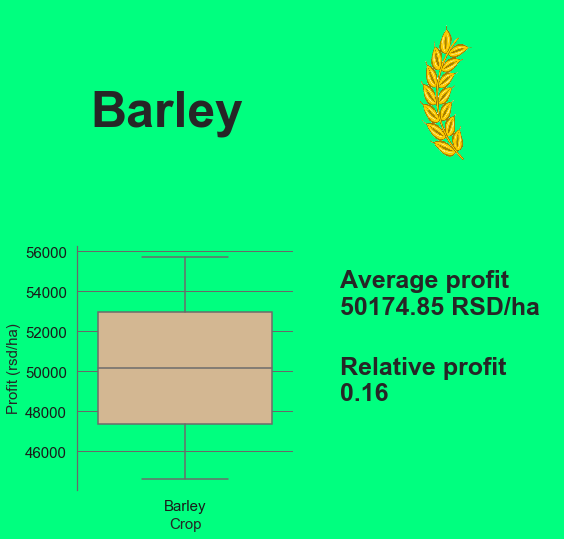

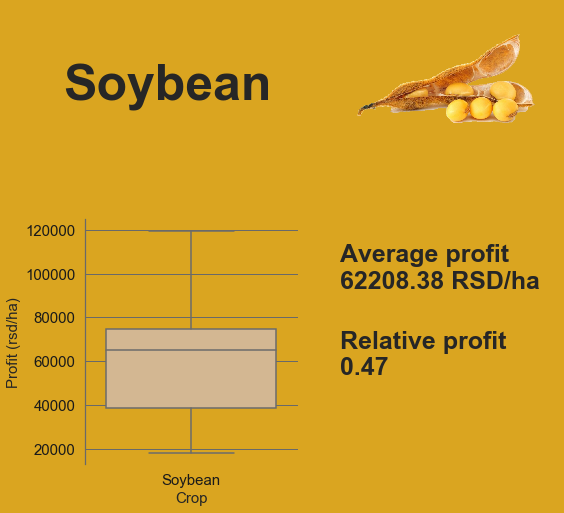

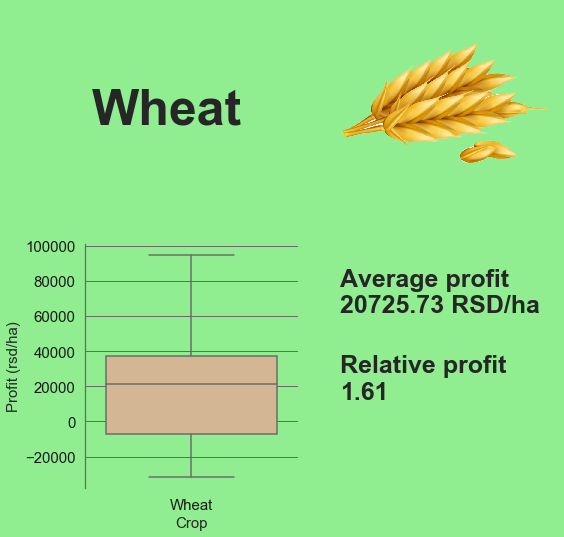

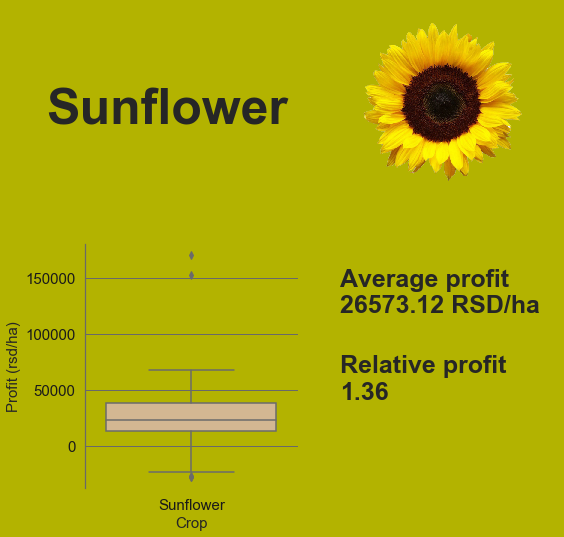

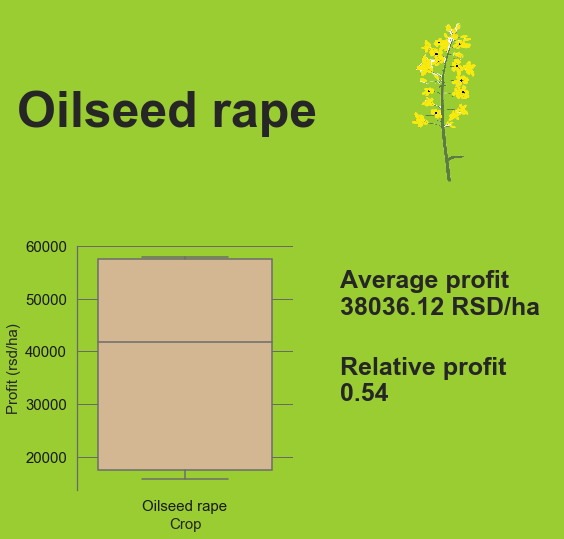

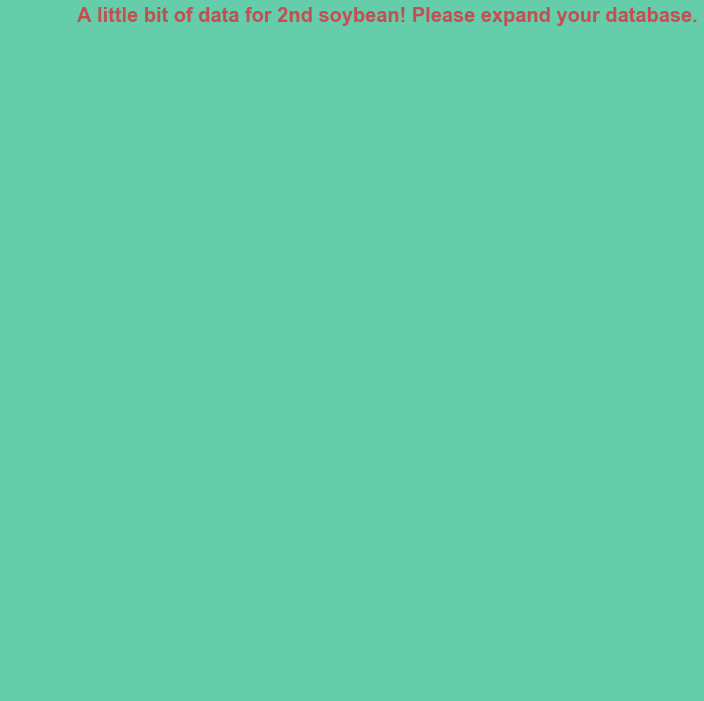

In [64]:
for i in range(n):
    profit(datap,i)

In [65]:
grouped_fp = data[['Fertiliser amount','Pesticide amount']].groupby(data['Crop'])
fp_mean = grouped_fp.mean()
fp_mean

,Fertiliser amount,Pesticide amount
Crop,,
2nd soybean,268.470000,1.570000
Barley,348.438182,4.318599
Maize,426.432458,3.209088
Oilseed rape,620.332712,12.445307
Soybean,316.911727,7.189057
Sunflower,318.253804,6.213735
Wheat,599.808986,5.885619


In [66]:
ranked_f = fp_mean.sort_values(by=['Fertiliser amount'],ascending=False)
ranked_f

,Fertiliser amount,Pesticide amount
Crop,,
Oilseed rape,620.332712,12.445307
Wheat,599.808986,5.885619
Maize,426.432458,3.209088
Barley,348.438182,4.318599
Sunflower,318.253804,6.213735
Soybean,316.911727,7.189057
2nd soybean,268.470000,1.570000


In [67]:
ranked_p = fp_mean.sort_values(by=['Pesticide amount'],ascending=False)
ranked_p

,Fertiliser amount,Pesticide amount
Crop,,
Oilseed rape,620.332712,12.445307
Soybean,316.911727,7.189057
Sunflower,318.253804,6.213735
Wheat,599.808986,5.885619
Barley,348.438182,4.318599
Maize,426.432458,3.209088
2nd soybean,268.470000,1.570000


In [68]:
os.chdir('D:\\Moji fajlovi\\Master\\prog\\Project 5 - Agriculture Data Analysis')

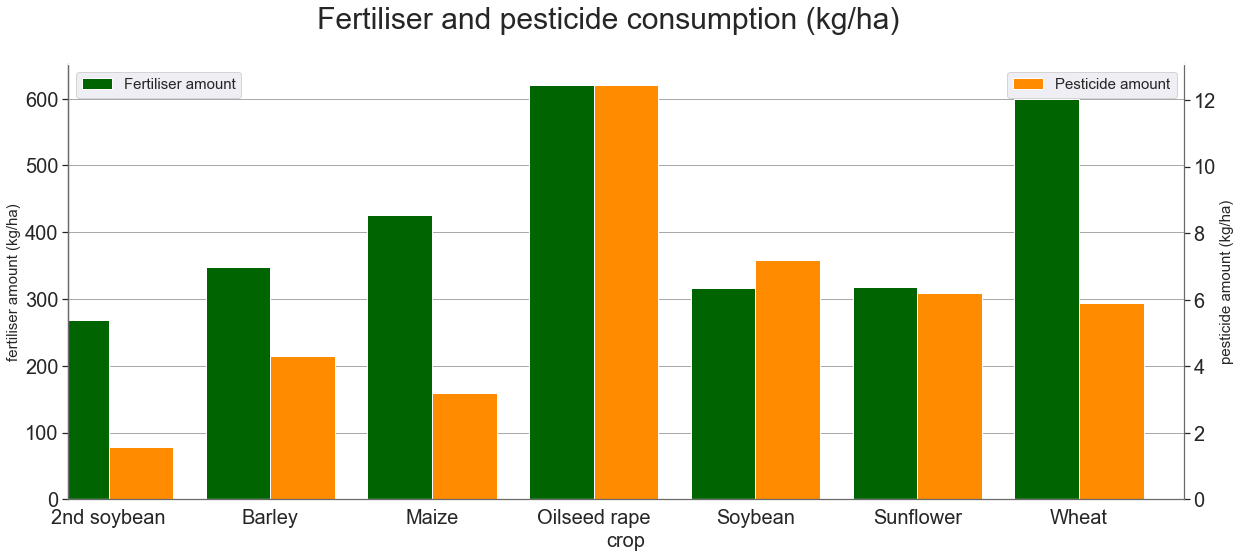

In [69]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4 #for bars

fp_mean['Fertiliser amount'].plot(kind='bar', color='darkgreen', ax=ax, width=width, position=1,rot=0,fontsize=20)
fp_mean['Pesticide amount'].plot(kind='bar', color='darkorange', ax=ax2, width=width, position=0,rot=0,fontsize=20)

ax.set_ylabel('fertiliser amount (kg/ha)',fontsize=15)
ax2.set_ylabel('pesticide amount (kg/ha)',fontsize=15)
ax.set_xlabel('crop',fontsize=20)
ax.legend(['Fertiliser amount'],loc='upper left', fontsize=15)
ax2.legend(['Pesticide amount'],loc='upper right',fontsize=15)
ax.spines['top'].set_visible(False)

ax2.spines['bottom'].set_color('dimgray')
ax2.spines['right'].set_color('dimgray')
ax2.spines['left'].set_color('dimgray')
ax.spines['left'].set_color('dimgray')

ax.set_facecolor('w')
ax.grid(axis='y',color='darkgrey')
ax.grid(None,axis='x')
ax2.grid(None)

#fig.savefig('fertilizer_pesticide.png',bbox_inches='tight',transparent=True)
fig.suptitle('Fertiliser and pesticide consumption (kg/ha)',x=0.5,y=0.98,fontsize=30,fontweight='medium')
plt.show()
plt.close(fig)

In [70]:
grouped_fp_byvar = data[['Fertiliser amount','Pesticide amount']].groupby(data['Variety'])
fp_byvar_mean = grouped_fp_byvar.mean()
fp_byvar_mean

,Fertiliser amount,Pesticide amount
Variety,,
Athlon,802.095000,7.507500
Basmati,585.585000,5.817526
DKC 4943,406.980000,2.910000
DKC 5007,408.741434,2.608645
DKC 5031,480.075984,2.068384
DKC 5276,252.638890,4.624717
DKC 5830,468.647458,1.200937
DKC5276,448.950000,9.680000
Falcon,1084.850000,7.480000


In [71]:
top3_var_p = fp_byvar_mean.sort_values(by=['Pesticide amount'],ascending=False)[:3]
top3_var_p

,Fertiliser amount,Pesticide amount
Variety,,
Immient,620.332712,12.445307
Sumiko,121.130000,11.590000
LG 56.33CL,521.093333,10.683333


In [72]:
top3_var_f = fp_byvar_mean.sort_values(by=['Fertiliser amount'],ascending=False)[:3]
top3_var_f

,Fertiliser amount,Pesticide amount
Variety,,
Falcon,1084.850,7.4800
Athlon,802.095,7.5075
Opusteam,659.830,7.3500


In [73]:
#print appropriate crop next to variety
for i in range(n):
    data2 = data[data['Crop'] == crops[i]]
    varieties = list(data2['Variety'].unique())
    variety = list(top3_var_p.index.values)
    if variety[0] in varieties:
        top3_var_p.loc[variety[0],'Crop'] = crops[i]
    if variety[1] in varieties:
        top3_var_p.loc[variety[1],'Crop'] = crops[i]
    if variety[2] in varieties:
        top3_var_p.loc[variety[2],'Crop'] = crops[i]
columns = ['Crop','Pesticide amount','Fertiliser amount']
top3_var_p = top3_var_p[columns]
top3_var_p #for pesticide

,Crop,Pesticide amount,Fertiliser amount
Variety,,,
Immient,Oilseed rape,12.445307,620.332712
Sumiko,Sunflower,11.590000,121.130000
LG 56.33CL,Sunflower,10.683333,521.093333


In [74]:
top3_var_p[['Pesticide amount','Fertiliser amount']] = top3_var_p[['Pesticide amount','Fertiliser amount']].apply(lambda x: round(x,2))
top3_var_p

,Crop,Pesticide amount,Fertiliser amount
Variety,,,
Immient,Oilseed rape,12.45,620.33
Sumiko,Sunflower,11.59,121.13
LG 56.33CL,Sunflower,10.68,521.09


In [75]:
styles = [dict(selector="th", props=[("font-size", "100%"),("text-align", "center"),("background-color","olivedrab"),("border-left","0.2px solid black")]),
          dict(selector="caption", props=[("text-align","center"),("font-weight","bold"),("font-size","150%")]),
         dict(selector="td", props=[("font-size", "100%"),("text-align", "center"),("background-color","#cce59a"),("border","0.2px solid black")]),
          dict(selector="th:first-child", props=[("border","0.2px solid black")]),
         dict(selector='',props=[("border-collapse","collapse"),("border","0.2px solid black")])]

styler3_p = top3_var_p.style.set_table_styles(styles).set_caption('Varieties with most used pesticide')

styler3_p

,Crop,Pesticide amount,Fertiliser amount
Variety,,,
Immient,Oilseed rape,12.45,620.33
Sumiko,Sunflower,11.59,121.13
LG 56.33CL,Sunflower,10.68,521.09


In [76]:
for i in range(n):
    data2 = data[data['Crop'] == crops[i]]
    varieties = list(data2['Variety'].unique())
    variety = list(top3_var_f.index.values)
    if variety[0] in varieties:
        top3_var_f.loc[variety[0],'Crop'] = crops[i]
    if variety[1] in varieties:
        top3_var_f.loc[variety[1],'Crop'] = crops[i]
    if variety[2] in varieties:
        top3_var_f.loc[variety[2],'Crop'] = crops[i]
columns = ['Crop','Fertiliser amount','Pesticide amount']
top3_var_f = top3_var_f[columns]
top3_var_f #for fetilizer

,Crop,Fertiliser amount,Pesticide amount
Variety,,,
Falcon,Wheat,1084.850,7.4800
Athlon,Wheat,802.095,7.5075
Opusteam,Wheat,659.830,7.3500


In [77]:
top3_var_f[['Fertiliser amount','Pesticide amount']] = top3_var_f[['Fertiliser amount','Pesticide amount']].apply(lambda x: round(x,2))
top3_var_f

,Crop,Fertiliser amount,Pesticide amount
Variety,,,
Falcon,Wheat,1084.85,7.48
Athlon,Wheat,802.10,7.51
Opusteam,Wheat,659.83,7.35


In [78]:
styles = [dict(selector="th", props=[("font-size", "100%"),("text-align", "center"),("background-color","olivedrab"),("border-left","0.2px solid black")]),
          dict(selector="caption", props=[("text-align","center"),("font-weight","bold"),("font-size","150%")]),
         dict(selector="td", props=[("font-size", "100%"),("text-align", "center"),("background-color","#cce59a"),("border","0.2px solid black")]),
          dict(selector="th:first-child", props=[("border","0.2px solid black")]),
         dict(selector='',props=[("border-collapse","collapse"),("border","0.2px solid black")])]

styler3_f = top3_var_f.style.set_table_styles(styles).set_caption('Varieties with most used pesticide')

styler3_f

,Crop,Fertiliser amount,Pesticide amount
Variety,,,
Falcon,Wheat,1084.85,7.48
Athlon,Wheat,802.1,7.51
Opusteam,Wheat,659.83,7.35


In [79]:
avg = datap['Profit'].groupby([datap['Crop'],datap['Year']]).mean()
avg

Crop          Year
2nd soybean   2017   -36906.834983
Barley        2016    55733.293467
              2018    44616.414471
Maize         2016    81186.361763
              2017     3798.452792
              2018    86740.116464
Oilseed rape  2017    17403.900000
              2018    43194.178474
Soybean       2016    78399.950184
              2017    30976.215984
              2018    77248.973131
Sunflower     2016    34081.473755
              2017     3926.426593
              2018    36284.014782
Wheat         2016    31515.736855
              2017   -10249.406024
              2018    66000.558219
Name: Profit, dtype: float64

In [80]:
def func2(pct, allvals):
    percent = float((100*pct)/sum(allvals))
    return "{:.2f}%".format(pct,percent)

In [81]:
def evaluate_decision(data):
    table = data[['Crop','Previous crop']].pivot_table(index='Previous crop', columns='Crop',aggfunc=len,fill_value=0)
    average_profit = data['Profit'].groupby([data['Crop'],data['Year']]).mean()
    index = list(average_profit.index.values) #list of pairs crop-year
    
    good_parcels = 0
    bad_parcels = 0
    not_enough_data = 0
    
    columns = ['Parcel','Year','Existing crop','Relaized profit','Previous crop','Max profit gain','Crop for max','Average profit \n gain']
    df = pd.DataFrame(columns=columns) #i will fill this df later
    for i in list(data.index.values):
        possible_profits = [] #list of all possible profits that could be obtained if we had picked some other crop
        pcrops = []
        crop_today = data.loc[i,'Crop'] #crop which we planted in observed year
        crop_before = data.loc[i,'Previous crop'] #previous crop
        year = data.loc[i,'Year'] #observed year
        profit_today = data.loc[i,'Profit'] #achieved profit in observed year
        
        oportunities = table.loc[crop_before]
        
        possible_crops = [c for c in list(oportunities.index.values) if oportunities[c] != 0]  # crops which could be planted a year before
        for crop_tomorrow in possible_crops: #for every possible crop which could be planted do next
            if crop_tomorrow != crop_today:
                if (crop_tomorrow,year) in index: #if it is true then we have an average profit which is our possible profit
                    possible_profit = average_profit.xs((crop_tomorrow,year))
                    possible_profits += [possible_profit]
                    pcrops += [crop_tomorrow]
        
        #i need try-except block because sometimes possible_profits is empty, in that case we don't have enough information
        try:
            possible_profits = np.array(possible_profits)
            ind = possible_profits.argmax()
            
            if profit_today >= possible_profits[ind]: #decision is good if we achieved a better profit than one we could
                good_parcels += 1
                avg = possible_profits.sum()/float(len(possible_profits)) #average possible profit
                df.loc[i] = [data.loc[i,'Parcel'],year,crop_today,round(profit_today,2),crop_before,round(possible_profits[ind],2),pcrops[ind],round(avg,2)]
            else:
                bad_parcels += 1
        except ValueError:
            not_enough_data += 1
    df.index = np.arange(1,df.shape[0]+1,1)
    return bad_parcels,good_parcels,not_enough_data, df

In [82]:
bad_parcels, good, not_enough_data, d = evaluate_decision(datap)

In [83]:
d #data frame with parcels which have brought good decision

,Parcel,Year,Existing crop,Relaized profit,Previous crop,Max profit gain,Crop for max,Average profit gain
1,G-3/1,2018,Maize,119572.85,Wheat,77248.97,Soybean,52242.39
2,G-3/2,2018,Maize,124376.19,Wheat,77248.97,Soybean,52242.39
3,G-6/1,2018,Soybean,119599.55,Maize,86740.12,Maize,58410.28
4,G-6/2,2018,Soybean,115085.49,Maize,86740.12,Maize,58410.28
5,B-5,2018,Maize,74137.13,Sunflower,66000.56,Wheat,66000.56
6,C-1,2018,Maize,82078.99,Sunflower,66000.56,Wheat,66000.56
7,C-4,2018,Wheat,95023.12,Sunflower,86740.12,Maize,86740.12
8,D-1,2018,Maize,91622.88,Wheat,77248.97,Soybean,52242.39
9,D-2,2018,Maize,98328.94,Wheat,77248.97,Soybean,52242.39
10,D-3,2018,Maize,103943.53,Wheat,77248.97,Soybean,52242.39


In [84]:
styles = [dict(selector="th", props=[("font-size", "100%"),("text-align", "center"),("background-color","olivedrab"),("border-left","0.2px solid black")]),
          dict(selector="caption", props=[("text-align","center"),("font-weight","bold"),("font-size","150%")]),
         dict(selector="td", props=[("font-size", "100%"),("text-align", "center"),("background-color","#cce59a"),("border","0.2px solid black")]),
          dict(selector="th:first-child", props=[("border","0.2px solid black")]),
         dict(selector='',props=[("border-collapse","collapse"),("border","0.2px solid black")])]

styler5 = d[:20].style.set_table_styles(styles).set_caption('Some parcels with good decision')

styler5

,Parcel,Year,Existing crop,Relaized profit,Previous crop,Max profit gain,Crop for max,Average profit gain
1,G-3/1,2018,Maize,119573,Wheat,77249,Soybean,52242.4
2,G-3/2,2018,Maize,124376,Wheat,77249,Soybean,52242.4
3,G-6/1,2018,Soybean,119600,Maize,86740.1,Maize,58410.3
4,G-6/2,2018,Soybean,115085,Maize,86740.1,Maize,58410.3
5,B-5,2018,Maize,74137.1,Sunflower,66000.6,Wheat,66000.6
6,C-1,2018,Maize,82079,Sunflower,66000.6,Wheat,66000.6
7,C-4,2018,Wheat,95023.1,Sunflower,86740.1,Maize,86740.1
8,D-1,2018,Maize,91622.9,Wheat,77249,Soybean,52242.4
9,D-2,2018,Maize,98328.9,Wheat,77249,Soybean,52242.4
10,D-3,2018,Maize,103944,Wheat,77249,Soybean,52242.4


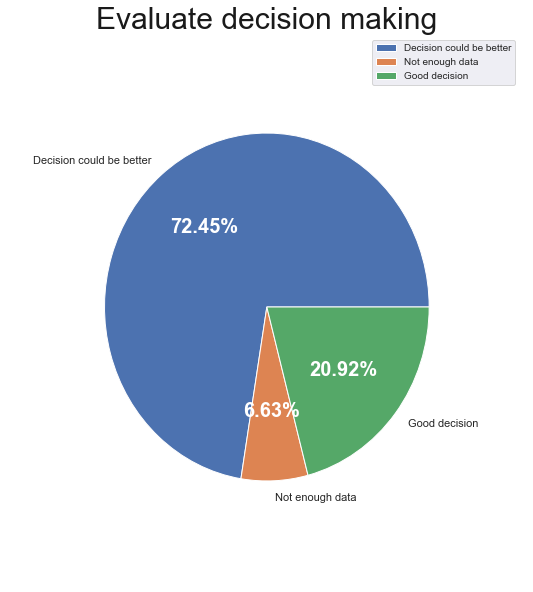

In [85]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
    
pie = [bad_parcels,not_enough_data,good]
wedges, texts, autotexts = ax.pie(x=pie, labels=['Decision could be better','Not enough data','Good decision'],
                                      autopct=lambda pct: func2(pct, pie),radius=0.8)
plt.setp(autotexts,fontsize=20,fontweight='bold', color='w')
        
ax.set_title('Evaluate decision making',fontdict={'fontsize': 30, 'fontweight': 'medium', 'color': 'k'})
ax.legend(loc=1,fontsize=10)

fig.savefig('evaluation.png',bbox_inches='tight',transparent=True)
ax.axis('off')
    
plt.show()
plt.close(fig)

In [86]:
#additional analysis: relative share fertiliser and pesticide costs in all costs
grouped_c = dfcosts.sum(axis=1).groupby(datap['Crop'])
outcomes = grouped_c.mean()
outcomes

Crop
2nd soybean      71492.754983
Barley           71381.177931
Maize            88530.771330
Oilseed rape    100813.684261
Soybean          82764.193217
Sunflower        77219.596035
Wheat            91384.414736
dtype: float64

In [87]:
#converting column Pesticide application
#it was converted but in dfcosts not in datap data frame
datap['Pesticide application'] = datap['Pesticide application'].apply(convert_todot)

In [88]:
grouped_fp_costs = datap[['Fertiliser','Fertiliser application','Pesticide','Pesticide application']].groupby(datap['Crop'])
fp_costs = grouped_fp_costs.mean()
fp_costs #i pick all costs about fertilizer and pesticide

,Fertiliser,Fertiliser application,Pesticide,Pesticide application
Crop,,,,
2nd soybean,16139.890000,1604.700000,2626.070000,8578.530000
Barley,13313.906569,3062.725000,6086.091715,9878.265000
Maize,19450.843995,3064.388184,6390.435597,6057.792622
Oilseed rape,25257.991834,5035.905764,17011.234640,17957.061828
Soybean,13942.236293,3599.737222,9798.942348,10437.258333
Sunflower,15596.185699,2775.548840,9719.996658,7657.987165
Wheat,21900.033306,4755.555573,11871.429265,8824.135003


In [89]:
relative_fertilizer = fp_costs['Fertiliser']*100 / outcomes
relative_fertilizer

Crop
2nd soybean     22.575560
Barley          18.651845
Maize           21.970716
Oilseed rape    25.054130
Soybean         16.845735
Sunflower       20.197186
Wheat           23.964736
dtype: float64

In [90]:
relative_pesticide = fp_costs['Pesticide']*100 / outcomes
relative_pesticide

Crop
2nd soybean      3.673197
Barley           8.526186
Maize            7.218321
Oilseed rape    16.873934
Soybean         11.839591
Sunflower       12.587474
Wheat           12.990650
dtype: float64

In [91]:
relative_fapp = fp_costs['Fertiliser application']*100 / outcomes
relative_fapp

Crop
2nd soybean     2.244563
Barley          4.290662
Maize           3.461382
Oilseed rape    4.995260
Soybean         4.349390
Sunflower       3.594358
Wheat           5.203902
dtype: float64

In [92]:
relative_papp = fp_costs['Pesticide application']*100 / outcomes
relative_papp

Crop
2nd soybean     11.999160
Barley          13.838753
Maize            6.842584
Oilseed rape    17.812127
Soybean         12.610838
Sunflower        9.917155
Wheat            9.656061
dtype: float64

In [93]:
sharef = pd.concat([relative_fertilizer,relative_fapp],axis=1)
sharef['Total'] = relative_fertilizer + relative_fapp
sharef.columns = ['Fertilizer','Fertilizer application','Total']
sharef = sharef.applymap(lambda x: "{:.2f}%".format(x))
sharef

,Fertilizer,Fertilizer application,Total
Crop,,,
2nd soybean,22.58%,2.24%,24.82%
Barley,18.65%,4.29%,22.94%
Maize,21.97%,3.46%,25.43%
Oilseed rape,25.05%,5.00%,30.05%
Soybean,16.85%,4.35%,21.20%
Sunflower,20.20%,3.59%,23.79%
Wheat,23.96%,5.20%,29.17%


In [94]:
sharep = pd.concat([relative_pesticide,relative_papp],axis=1)
sharep['Total'] = relative_pesticide + relative_papp
sharep.columns = ['Pesticide','Pesticide application','Total']
sharep = sharep.applymap(lambda x: "{:.2f}%".format(x))
sharep

,Pesticide,Pesticide application,Total
Crop,,,
2nd soybean,3.67%,12.00%,15.67%
Barley,8.53%,13.84%,22.36%
Maize,7.22%,6.84%,14.06%
Oilseed rape,16.87%,17.81%,34.69%
Soybean,11.84%,12.61%,24.45%
Sunflower,12.59%,9.92%,22.50%
Wheat,12.99%,9.66%,22.65%


In [95]:
styles = [dict(selector="th", props=[("font-size", "100%"),("text-align", "center"),("background-color","olivedrab"),("border-left","0.2px solid black")]),
          dict(selector="caption", props=[("text-align","center"),("font-weight","bold"),("font-size","150%")]),
         dict(selector="td", props=[("font-size", "100%"),("text-align", "center"),("background-color","#cce59a"),("border","0.2px solid black")]),
          dict(selector="th:first-child", props=[("border","0.2px solid black")]),
          dict(selector="tr td:last-child", props=[("font-weight","bold")]),
         dict(selector='',props=[("border-collapse","collapse"),("border","0.2px solid black")])]

styler4 = sharef.style.set_table_styles(styles).set_caption('Share of fertilizer costs in all costs')

styler4

,Fertilizer,Fertilizer application,Total
Crop,,,
2nd soybean,22.58%,2.24%,24.82%
Barley,18.65%,4.29%,22.94%
Maize,21.97%,3.46%,25.43%
Oilseed rape,25.05%,5.00%,30.05%
Soybean,16.85%,4.35%,21.20%
Sunflower,20.20%,3.59%,23.79%
Wheat,23.96%,5.20%,29.17%


In [96]:
styles = [dict(selector="th", props=[("font-size", "100%"),("text-align", "center"),("background-color","olivedrab"),("border-left","0.2px solid black")]),
          dict(selector="caption", props=[("text-align","center"),("font-weight","bold"),("font-size","150%")]),
         dict(selector="td", props=[("font-size", "100%"),("text-align", "center"),("background-color","#cce59a"),("border","0.2px solid black")]),
          dict(selector="th:first-child", props=[("border","0.2px solid black")]),
          dict(selector="tr td:last-child", props=[("font-weight","bold")]),
         dict(selector='',props=[("border-collapse","collapse"),("border","0.2px solid black")])]

styler5 = sharep.style.set_table_styles(styles).set_caption('Share of pesticide costs in all costs')

styler5

,Pesticide,Pesticide application,Total
Crop,,,
2nd soybean,3.67%,12.00%,15.67%
Barley,8.53%,13.84%,22.36%
Maize,7.22%,6.84%,14.06%
Oilseed rape,16.87%,17.81%,34.69%
Soybean,11.84%,12.61%,24.45%
Sunflower,12.59%,9.92%,22.50%
Wheat,12.99%,9.66%,22.65%
